In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

import os
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [ ]:
train_set = datasets.CIFAR10("./data", download=True, transform=
                                                transforms.Compose([transforms.ToTensor()]))
test_set = datasets.CIFAR10("./data", download=True, train=False, transform=
                                               transforms.Compose([transforms.ToTensor()])) 

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
train_loader = torch.utils.data.DataLoader(train_set, 
                                           batch_size=100)
test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size=100)

10 types

Making a method that return the name of class for the label number. ex. if the label is 5, we return dog.

In [ ]:
def output_label(label):
    output_mapping = {
                 0: "airplane",
                 1: "automobile",
                 2: "bird",
                 3: "cat",
                 4: "deer", 
                 5: "dog", 
                 6: "frog",
                 7: "horse",
                 8: "ship",
                 9: "truck"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

get device for training

In [ ]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda:0 device


In [ ]:
from sklearn.utils.extmath import softmax
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.lrelu = nn.LeakyReLU(0.01,False)
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=32, kernel_size=3, padding=1)
        self.batch1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.batch2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.batch3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fully_connected = nn.Sequential(
            nn.Linear(2*2*128, 512),
            nn.LeakyReLU(),
            nn.Dropout(0.25),
            nn.Linear(512, 512),
            nn.LeakyReLU(),
            nn.Dropout(0.25),
            nn.Linear(512, 10),
            nn.LeakyReLU(),
        )

    def forward(self, x):
      x = self.lrelu(self.conv1(x))
      x = self.max_pool(self.lrelu(self.batch2(self.conv2(x))))
      xd = self.max_pool(self.lrelu(self.batch3(self.conv3(x))))
      x = self.lrelu(self.batch3(self.conv4(xd)))
      x = self.lrelu(self.batch3(self.conv4(x)))
      xd = self.max_pool(self.lrelu(self.conv4(x)+xd))
      x = self.max_pool(self.lrelu(self.batch3(self.conv4(xd))))
      x = self.flatten(x)
      logits = self.fully_connected(x)
      return logits
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (lrelu): LeakyReLU(negative_slope=0.01)
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fully_connected): Sequential(
    (0): Linear(in_features=512, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Dropout(p=0.25, inplace=False)
    (3): Linear(in_features=512, out_features=

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (lrelu): LeakyReLU(negative_slope=0.01)
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fully_connected): Sequential(
    (0): Linear(in_features=512, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Dropout(p=0.25, inplace=False)
    (3): Linear(in_features=512, out_features=

an example 

In [ ]:
X = torch.rand(100,3, 32,32, device="cuda:0") 
X = model(X)
# pred_probab = nn.Softmax(dim=1)(logits)
# y_pred = pred_probab.argmax(1)
# print(f"Predicted class: {y_pred}")

loss func an etc

In [ ]:
learning_rate = 0.001

error = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
'''num_epochs = 100
loss_values = []


for epoch in range(num_epochs):
    for X, y in train_loader:
        # zero the parameter gradients
        optimizer.zero_grad()
       
        # forward + backward + optimize
        pred = model(X)
        loss = loss_fn(pred, y.unsqueeze(-1))
        loss_values.append(loss.item())
        loss.backward()
        optimizer.step()

print("Training Complete")
'''

'num_epochs = 100\nloss_values = []\n\n\nfor epoch in range(num_epochs):\n    for X, y in train_loader:\n        # zero the parameter gradients\n        optimizer.zero_grad()\n       \n        # forward + backward + optimize\n        pred = model(X)\n        loss = loss_fn(pred, y.unsqueeze(-1))\n        loss_values.append(loss.item())\n        loss.backward()\n        optimizer.step()\n\nprint("Training Complete")\n'

In [ ]:
num_epochs = 25
count = 0
# Lists for visualization of loss and accuracy 
loss_list = []
iteration_list = []
accuracy_list = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Transfering images and labels to GPU if available
        images, labels = images.to(device), labels.to(device)
    
        train = Variable(images.view(100, 3, 32, 32))
        labels = Variable(labels)
        
        # Forward pass 
        outputs = model(train)
        loss = error(outputs, labels)
        
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
    
        count += 1
    
    # Testing the model
    
        if not (count % 50):    # It's same as "if count % 50 == 0"
            total = 0
            correct = 0
        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images.view(100, 3, 32, 32))
            
                outputs = model(test)
            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.8429328203201294, Accuracy: 67.52999877929688%
Iteration: 1000, Loss: 0.6910427212715149, Accuracy: 73.98999786376953%
Iteration: 1500, Loss: 0.609462559223175, Accuracy: 76.75999450683594%
Iteration: 2000, Loss: 0.5018664002418518, Accuracy: 78.6199951171875%
Iteration: 2500, Loss: 0.36719435453414917, Accuracy: 79.75%
Iteration: 3000, Loss: 0.3434300124645233, Accuracy: 79.9000015258789%
Iteration: 3500, Loss: 0.2888079881668091, Accuracy: 80.05999755859375%
Iteration: 4000, Loss: 0.27471354603767395, Accuracy: 79.1199951171875%
Iteration: 4500, Loss: 0.21934622526168823, Accuracy: 79.4000015258789%
Iteration: 5000, Loss: 0.25995582342147827, Accuracy: 79.87999725341797%
Iteration: 5500, Loss: 0.1472151130437851, Accuracy: 80.11000061035156%
Iteration: 6000, Loss: 0.12657427787780762, Accuracy: 80.61000061035156%
Iteration: 6500, Loss: 0.09406538307666779, Accuracy: 80.94999694824219%
Iteration: 7000, Loss: 0.15051813423633575, Accuracy: 81.11000061035156%
Ite



**Training Complete**

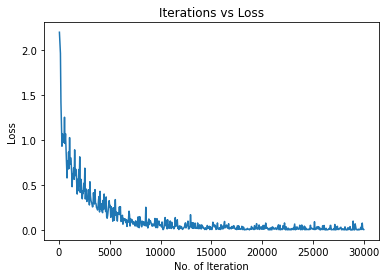

In [ ]:
if device != "cpu" :
  for ii in range(0,len(loss_list)):
    loss_list[ii]=loss_list[ii].cpu()
plt.plot(iteration_list, loss_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

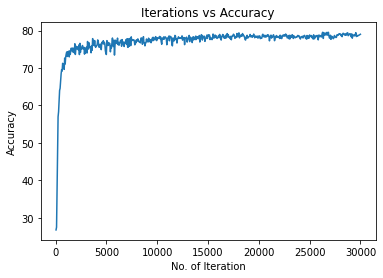

In [ ]:
if device != "cpu" :
  for ii in range(0,len(accuracy_list)):
    accuracy_list[ii]=accuracy_list[ii].cpu()
plt.plot(iteration_list, accuracy_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")
plt.show()

Looking the Accuracy in each class of 10cifar dataset

In [ ]:
class_correct = [0. for _ in range(10)]
total_correct = [0. for _ in range(10)]

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        test = Variable(images)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()
        
        for i in range(100):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1
        
for i in range(10):
    print(" {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

 airplane: 76.90%
 automobile: 86.60%
 bird: 69.70%
 cat: 61.10%
 deer: 78.70%
 dog: 69.00%
 frog: 85.80%
 horse: 81.50%
 ship: 91.20%
 truck: 89.80%
